In [4]:
import numpy as np
import cv2

readImageFromPath = lambda path: cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
resizedImageFromPath = lambda imagePath: cv2.resize(readImageFromPath(imagePath), (224, 224), fx=0.1, fy=0.1, interpolation = cv2.INTER_CUBIC)

In [5]:
from random import randint
import math
from matplotlib import pyplot as plt

s = (500,500)

def gaussian(x, b, c):
    return math.exp(-(x - b)**2 / (2 * c**2))

def createPuncturedStim(imagePath, numBubbles):
    input1 = readImageFromPath(imagePath)
    input1 = cv2.resize(input1, (224,224), interpolation = cv2.INTER_CUBIC)
    input1 = input1.astype('float64')
    finalMask = np.zeros((500,500),np.float64)

    for bubble in range(numBubbles):
        oneBubbleMask = np.zeros((500,500),np.float64)

        x = randint(1,500)
        y = randint(1,500)    

        j = 0
        radius = 50
        for i in range(1,radius, 2):
            color = (255*(gaussian(i,0,150/8)))
            cv2.circle(oneBubbleMask, (x,y), i,(color,color,color),2)
#             j = j + 1

        finalMask += oneBubbleMask#cv2.add(finalMask, oneBubbleMask)
        finalMask = np.clip(finalMask, 0, 255)
        
    finalMask = cv2.resize(finalMask, (224,224), interpolation = cv2.INTER_CUBIC)
    final = cv2.multiply(input1,finalMask)
    final = cv2.divide(final,255)
    # final = final.astype('uint8')
#     image = image.astype('uint8')

    return (final, finalMask)

In [25]:
img_A = createPuncturedStim("/Users/nishadsinghi/chetan_sir/large_bubbles_slim_font_with_filters/B.png", 15)

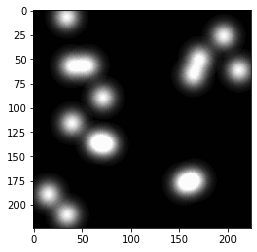

In [26]:
plt.imshow(img_A[1], cmap='gray')

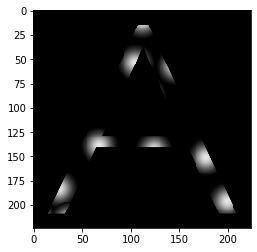

In [27]:
path = "/Users/nishadsinghi/chetan_sir/large_bubbles_slim_font_with_filters/25/A/0.png"
image = cv2.imread(path)
image_data = np.asarray(image, dtype = np.int16)
plt.imshow(image_data, cmap='gray')

In [6]:
numBubbles = [5, 10, 15, 20, 25, 30, 35, 40]
import os

def createDirectoryIfDoesntAlreadyExist(path):
    if not os.path.exists(path):
        os.mkdir(path)

def fun(numBubbles):
    np.random.seed(numBubbles)
    readPath = "/Users/nishadsinghi/chetan_sir/english_new_stim_1000Each/"
    allOriginalImageNames = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
    numStimuli = 1000
    writeDirectory = "/Users/nishadsinghi/chetan_sir/english_new_stim_1000Each/{}/".format(str(numBubbles))
    allWriteImageNames = [str(name)+'.png' for name in list(range(numStimuli))]

    createDirectoryIfDoesntAlreadyExist(writeDirectory)        
    [createDirectoryIfDoesntAlreadyExist(writeDirectory + imageName) for imageName in allOriginalImageNames]

    for originalImage in allOriginalImageNames:
        allStimPairs = [createPuncturedStim(readPath+originalImage+'.png', numBubbles) for _ in range(numStimuli)]
        allStimForThisImage = [pair[0] for pair in allStimPairs]
        allFiltersForThisImage = [pair[1] for pair in allStimPairs]
        allWritePaths = [writeDirectory+originalImage+"/"+writeImageName for writeImageName in allWriteImageNames]
        [cv2.imwrite(writePath, stim) for writePath, stim in zip(allWritePaths, allStimForThisImage)]
        os.mkdir(writeDirectory+originalImage+"/filter")
        allFilterWritePaths = [writeDirectory+originalImage+"/filter/"+writeImageName for writeImageName in allWriteImageNames]
        [cv2.imwrite(filterPath, filter) for filterPath, filter in zip(allFilterWritePaths, allFiltersForThisImage)]

[fun(num) for num in numBubbles]

[None, None, None, None, None, None, None, None]

In [1]:
import os
path = "/Users/nishadsinghi/chetan_sir/finalStim100Each"
folders = [5, 10, 15, 20, 25, 30]
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
IdsToDelete = range(100)

for folder in folders:
    for alphabet in alphabets:
        for idToDelete in IdsToDelete:
            finalPath = "{}/{}/{}/{}.png".format(path, folder, alphabet, idToDelete)
            if os.path.exists(finalPath):
                os.remove(finalPath)